# Lab 1

Matthew Rossouw
- z5220299
- 2022T2

In [59]:
# Setup
import numpy as np
import matplotlib.pyplot as plt
import cv2

cat = cv2.imread("Cat.png")
ct = cv2.imread("CT.png")
dog = cv2.imread("Dog.png")
kitten = cv2.imread("Kitten.png")

def mplib_show(img):
    """
    Shows an image using matplotlib because cv2 crashes in WSL.
    """
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### 1. Contrast stretching



In [69]:
def contrast_stretch(img: np.ndarray, a: int, b: int) -> np.ndarray:
    """
    Contrast stretches an image between intensity a -> b.
    Checks the blue value of colour tuples, since greyscale is assumed.
    
    Args:
        img: a greyscale image.
        a: minimum contrast value.
        b: maximum contrast value.
    Returns:
        np.ndarray: output image
    """
    if a >= b:
        raise Exception("Minimum bound must be less than maximum bound")
    
    # get min/max intensity
    (c, d) = find_minmax_intensity(img)

    # get size of image
    (iy, ix, ic) = img.shape

    # apply contrast stretch to each pixel
    for y in range(0, iy):
        for x in range(0, ix): # range loops are used here because iterators are read-only.
            # perform transform
            i : int = (img[y][x][0] - c) * (abs(b-a)/abs(d-c)) + a
            
            # Enforce limit between 0-255
            # i = max(i, 0)
            # i = min(i, 255)
            
            # set pixel
            img[y][x] = (i, i, i)

    return img

def find_minmax_intensity(img: np.ndarray):
    """
    Find maximum and minimum intensity of a greyscale image.
    Samples blue value since greyscale is assumed.

    Args:
        img: a greyscale image
    Returns:
        (min, max): tuple of integers for minimum and maximum.
    """
    min = 255   # minimum intensity value
    max = 0     # maximum intensity value

    # iterate over image and find minimum and maximum values
    for row in img:
        for px in row:
            if px[0] < min:
                min = px[0]
            if px[0] > max:
                max = px[0]
    
    return (min, max)

Before transform => min: 26 max: 150
After transform => min: 0 max: 255


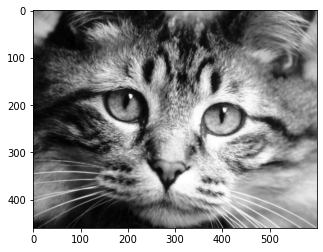

In [70]:
# Test of contrast_stretch
kitten = cv2.imread("Kitten.png")
(r_min, r_max) = find_minmax_intensity(kitten)

kitten_cs = contrast_stretch(kitten, 0, 255)
(cs_min, cs_max) = find_minmax_intensity(kitten_cs)

print(f"Before transform => min: {r_min} max: {r_max}")
print(f"After transform => min: {cs_min} max: {cs_max}")

mplib_show(kitten_cs)


### 2. Intensity histogram

In [94]:
def histogram(img: np.ndarray) -> None:
    """
    Renders a histogram using Matplotlib.pyplot from a greyscale image.
    Assumes 8 bit colour depth.
    Args:
        img: a grayscale image
    """
    # Get image params
    (iy, ix, c) = img.shape

    # Create array of intensity values
    i = [0] * 256
    flattened = img.ravel()

    # Iterate over image and calculate values
    for px in flattened:
        i[px] += 1
    
    # Create chart.
    plt.bar(range(0,256), i)
    plt.xlabel("Gray value")
    plt.ylabel("Occurences")
    plt.title("Histogram")
    # plt.semilogy() # log scale occurences
    plt.show()


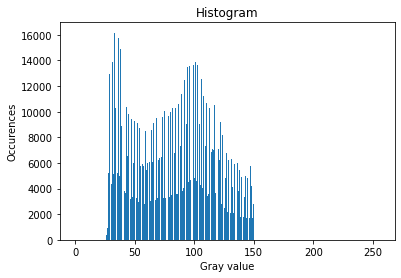

In [95]:
# Test histogram, plain image
kitten = cv2.imread("Kitten.png")
histogram(kitten)

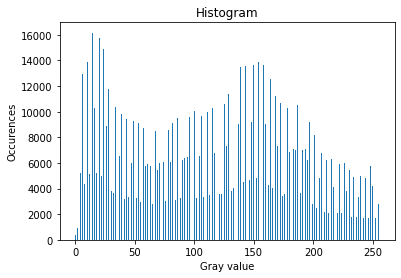

In [96]:
# Test histogram, contrast stretched image
kitten = cv2.imread("Kitten.png")
kitten = contrast_stretch(kitten, 0, 255)
histogram(kitten)

### 3. Image edges
